# Analyze CSV data collected from doing inference on trained models
## Looking at histogram representations, comparing EF, GLS, etc.

There are clearly some outliers, and it may be interesting to dive deeper into those specific patient cases to see what their echocardiogram looks like and how the model's segmentation compares the ground truth segmentation looks like (e.g. Dice score and eye-balling it).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

In [2]:
name = 'Original_Pretrained_R2plus1DMotionSegNet.pth.csv'
data = pd.read_csv(f'./csvs/{name}')
save_hists_as_svg = False

In [3]:
data.columns

Index(['Video Index', 'Predicted EF', 'True EF', 'Seg GLS', 'Warp GLS',
       'True GLS', 'Seg ED Dice', 'Seg ES Dice', 'Warp ED Dice',
       'Warp ES Dice'],
      dtype='object')

In [4]:
data.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,57.660572,55.651562,-0.155008,-0.174877,-0.131506,0.936521,0.907664,0.936171,0.912578
std,11.830781,12.095286,0.066949,0.104513,0.559186,0.029099,0.049415,0.028574,0.045683
min,10.039696,10.192957,-0.366337,-0.404040,-0.678832,0.682607,0.449400,0.676852,0.450435
25%,53.011067,51.927948,-0.198113,-0.222222,-0.196721,0.923341,0.888903,0.923179,0.894693
50%,59.691563,58.754887,-0.161290,-0.182540,-0.160920,0.942648,0.918592,0.942120,0.923935
75%,65.565989,63.574314,-0.115544,-0.138889,-0.118546,0.956883,0.941129,0.955779,0.942580
max,87.289323,84.452354,0.244681,2.484848,17.714286,0.983438,0.975293,0.978547,0.977159


In [5]:
low_efs = data.query("`Predicted EF` < 50")
normal_efs = data.query("`Predicted EF` >= 50 and `Predicted EF` <= 70")
high_efs = data.query("`Predicted EF` > 70")

low_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,38.971122,37.889432,-0.100070,-0.114590,-0.084476,0.939540,0.921797,0.940044,0.923766
std,9.738119,12.632978,0.060964,0.066281,0.153940,0.030582,0.045521,0.029256,0.043357
min,10.039696,10.192957,-0.337662,-0.298246,-0.275510,0.682607,0.674184,0.676852,0.674556
25%,33.786188,27.645145,-0.135135,-0.152381,-0.142857,0.929626,0.904427,0.930373,0.914108
50%,42.062156,37.387440,-0.098214,-0.120879,-0.097902,0.945308,0.936170,0.944196,0.935938
75%,46.920715,48.141052,-0.059829,-0.072072,-0.059829,0.958443,0.951968,0.957298,0.950820
max,49.943208,69.863739,0.107143,0.114583,1.162162,0.983438,0.975293,0.977331,0.971455


In [6]:
normal_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,60.710831,59.218980,-0.166071,-0.185586,-0.138188,0.936578,0.906655,0.936143,0.912910
std,5.182294,6.560303,0.059828,0.110885,0.660999,0.028139,0.048295,0.027812,0.043686
min,50.085073,29.127012,-0.339450,-0.393750,-0.678832,0.740185,0.449400,0.793912,0.450435
25%,56.630980,55.967918,-0.202899,-0.224638,-0.204082,0.923037,0.889136,0.921899,0.896652
50%,60.846058,59.670322,-0.169811,-0.191011,-0.170213,0.942571,0.917326,0.942128,0.922195
75%,64.913843,63.551777,-0.130952,-0.154545,-0.134146,0.957009,0.938511,0.955785,0.941348
max,69.895060,84.452354,0.244681,2.484848,17.714286,0.980471,0.972238,0.978547,0.977159


In [7]:
high_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,73.698329,66.103648,-0.187128,-0.220377,-0.178986,0.929987,0.886238,0.928519,0.887516
std,3.127698,4.449005,0.067397,0.064481,0.053029,0.031890,0.056133,0.031177,0.054274
min,70.002757,48.009235,-0.366337,-0.404040,-0.345238,0.803468,0.617809,0.805646,0.606257
25%,71.439430,63.978722,-0.231884,-0.258065,-0.211009,0.912999,0.866995,0.912642,0.870936
50%,72.807871,66.340637,-0.191011,-0.220779,-0.178571,0.936700,0.898305,0.934050,0.895522
75%,74.707107,68.647682,-0.152174,-0.173228,-0.153846,0.953744,0.920128,0.952074,0.923935
max,87.289323,77.112564,0.121739,-0.068376,0.050633,0.974725,0.960967,0.973559,0.965005


In [8]:
truth_low_efs = data.query("`True EF` < 50")
truth_normal_efs = data.query("`True EF` >= 50 and `True EF` <= 70")
truth_high_efs = data.query("`True EF` > 70")

truth_low_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,42.157378,36.534189,-0.104540,-0.121029,-0.087046,0.938758,0.927805,0.939422,0.927812
std,12.013018,10.081765,0.063399,0.068753,0.122929,0.030951,0.037231,0.030042,0.035783
min,10.039696,10.192957,-0.337662,-0.336538,-0.269565,0.682607,0.674184,0.676852,0.674556
25%,34.546735,28.406661,-0.142857,-0.156725,-0.137356,0.927532,0.917754,0.929597,0.918639
50%,43.867298,38.528938,-0.104167,-0.125000,-0.096154,0.944409,0.936725,0.944221,0.935915
75%,50.508982,45.323078,-0.064598,-0.080179,-0.056971,0.958484,0.950506,0.957546,0.950255
max,73.367947,49.884445,0.112360,0.114583,1.100000,0.983438,0.975293,0.978547,0.971455


In [9]:
truth_normal_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,61.730354,60.555115,-0.169044,-0.189158,-0.142175,0.936404,0.904633,0.935806,0.910493
std,7.131843,4.779425,0.060308,0.108814,0.640209,0.028432,0.047331,0.027950,0.044347
min,33.986387,50.005959,-0.366337,-0.404040,-0.678832,0.740185,0.449400,0.793912,0.450435
25%,56.942533,57.136208,-0.205882,-0.227273,-0.206897,0.923037,0.886859,0.922095,0.892069
50%,61.754194,60.396355,-0.172185,-0.194444,-0.172414,0.942688,0.913410,0.942065,0.919840
75%,66.682282,64.293854,-0.133333,-0.156250,-0.141176,0.956727,0.936968,0.955373,0.939920
max,84.047630,69.863739,0.244681,2.484848,17.714286,0.980804,0.972238,0.977558,0.977159


In [10]:
truth_high_efs.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,69.301482,73.111181,-0.171634,-0.211384,-0.191959,0.922140,0.831630,0.920544,0.849453
std,6.951096,3.208285,0.075183,0.074234,0.054631,0.028635,0.084987,0.028614,0.077243
min,57.032995,70.022636,-0.298969,-0.393750,-0.310345,0.853282,0.634421,0.860858,0.639821
25%,65.951605,71.014545,-0.219938,-0.246053,-0.235421,0.900643,0.810307,0.900106,0.823061
50%,67.930455,71.922012,-0.184783,-0.208333,-0.185185,0.917582,0.852496,0.921687,0.864407
75%,71.856562,74.696510,-0.120668,-0.163144,-0.149001,0.943983,0.882726,0.942543,0.893348
max,87.289323,84.452354,0.022472,-0.075949,-0.117021,0.963253,0.955951,0.966029,0.956938


## First just try look at the distribution of Ejection Fractions, GLS, ED/ES Dice

In [11]:
def createHist(x, column, xlabel, ylabel):
    fig = plt.figure(figsize=(20,10))
    plt.hist(x[column], bins=100);
    plt.title(column)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

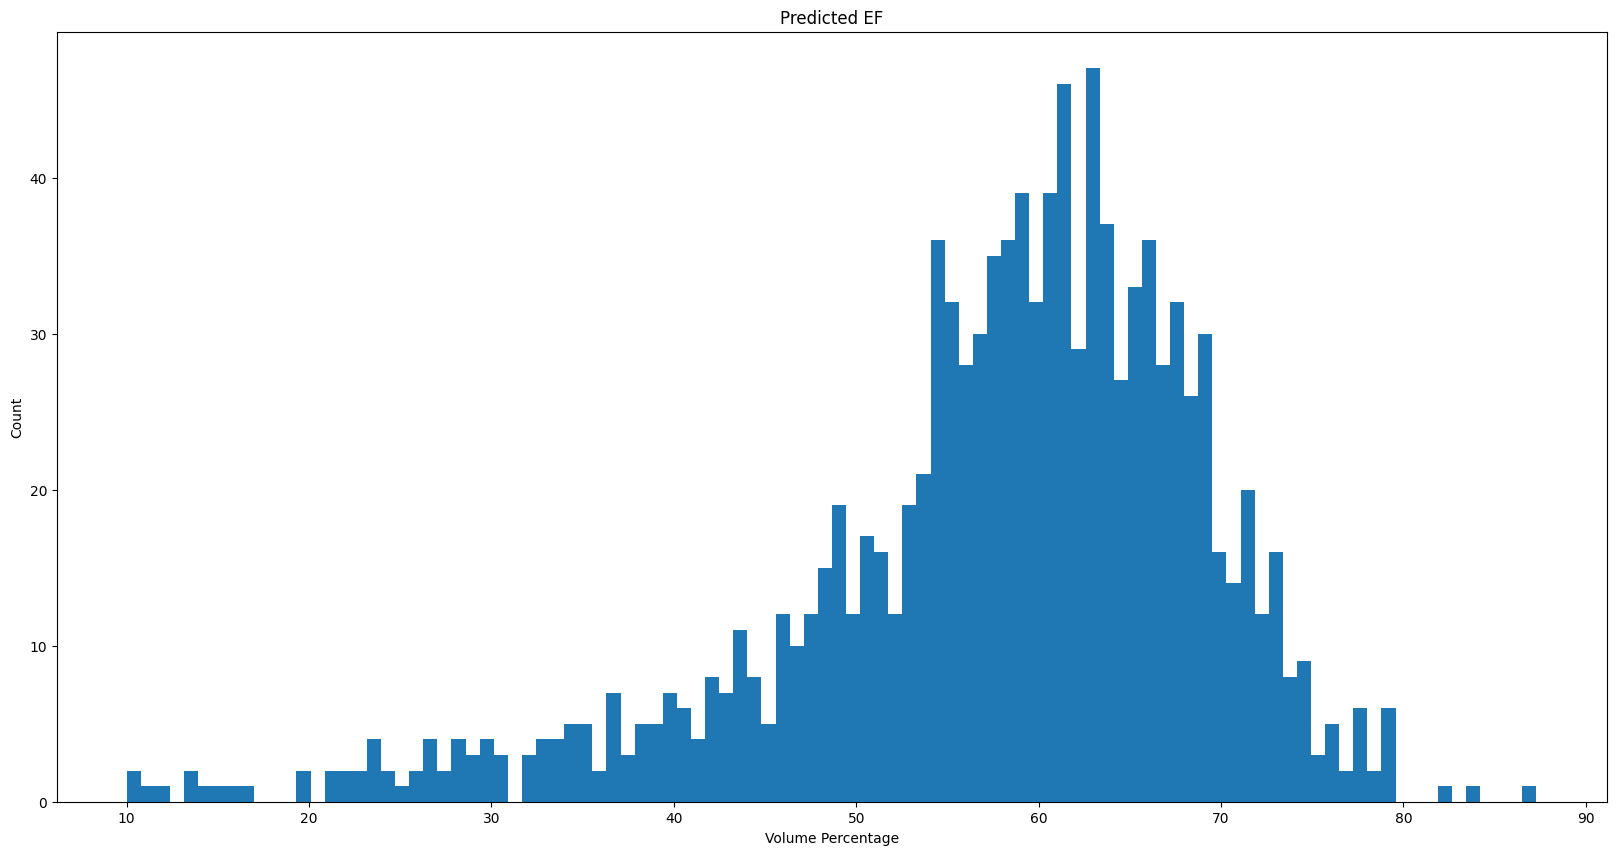

In [12]:
createHist(data, 'Predicted EF', 'Volume Percentage', 'Count')

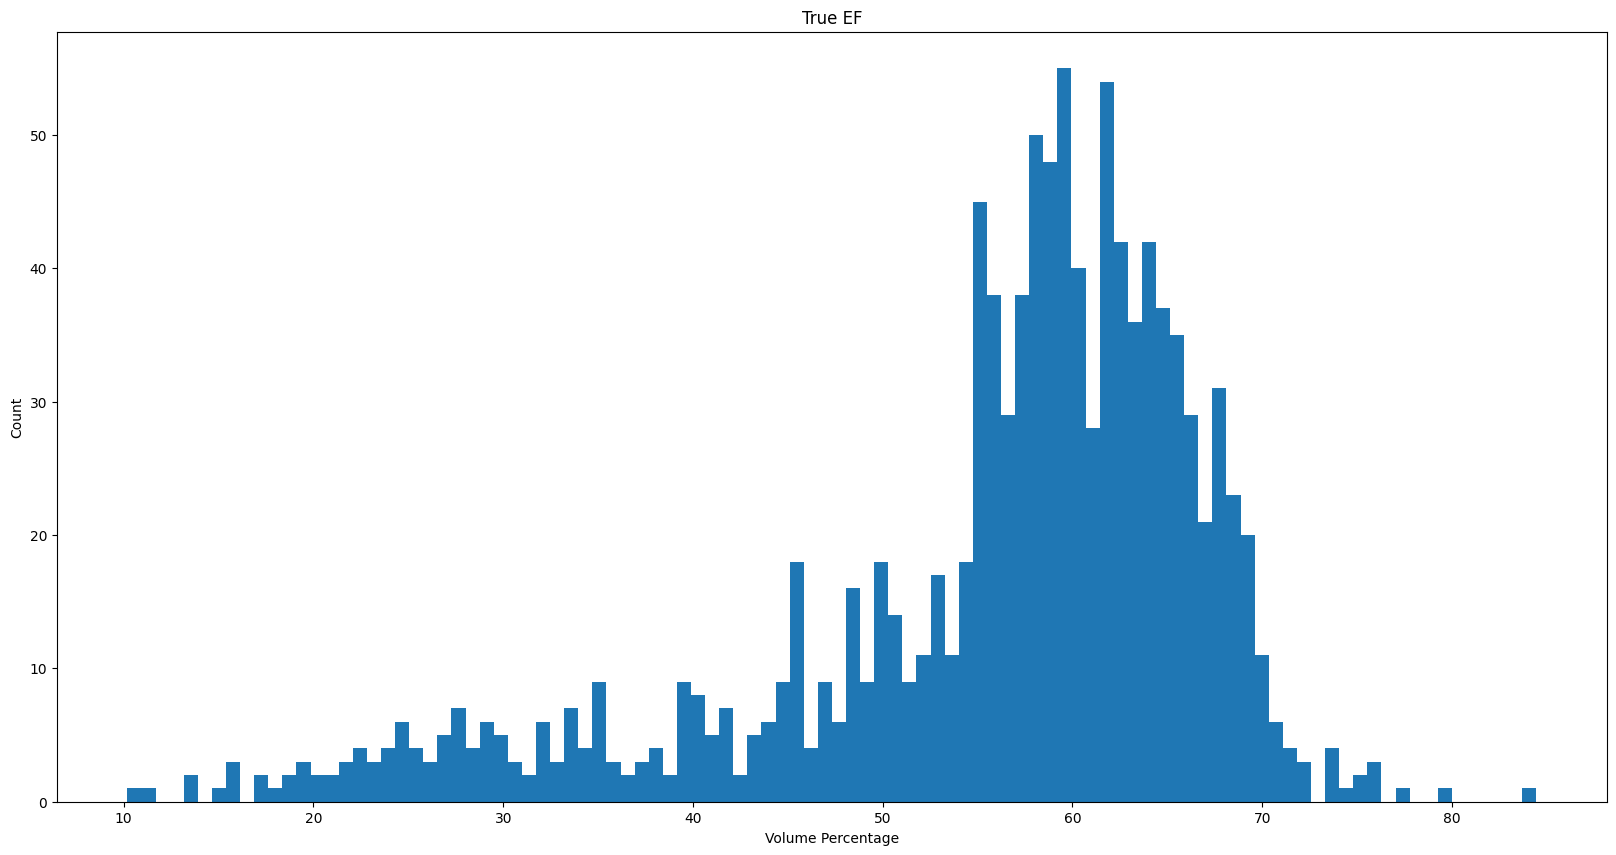

In [13]:
createHist(data, 'True EF', 'Volume Percentage', 'Count')

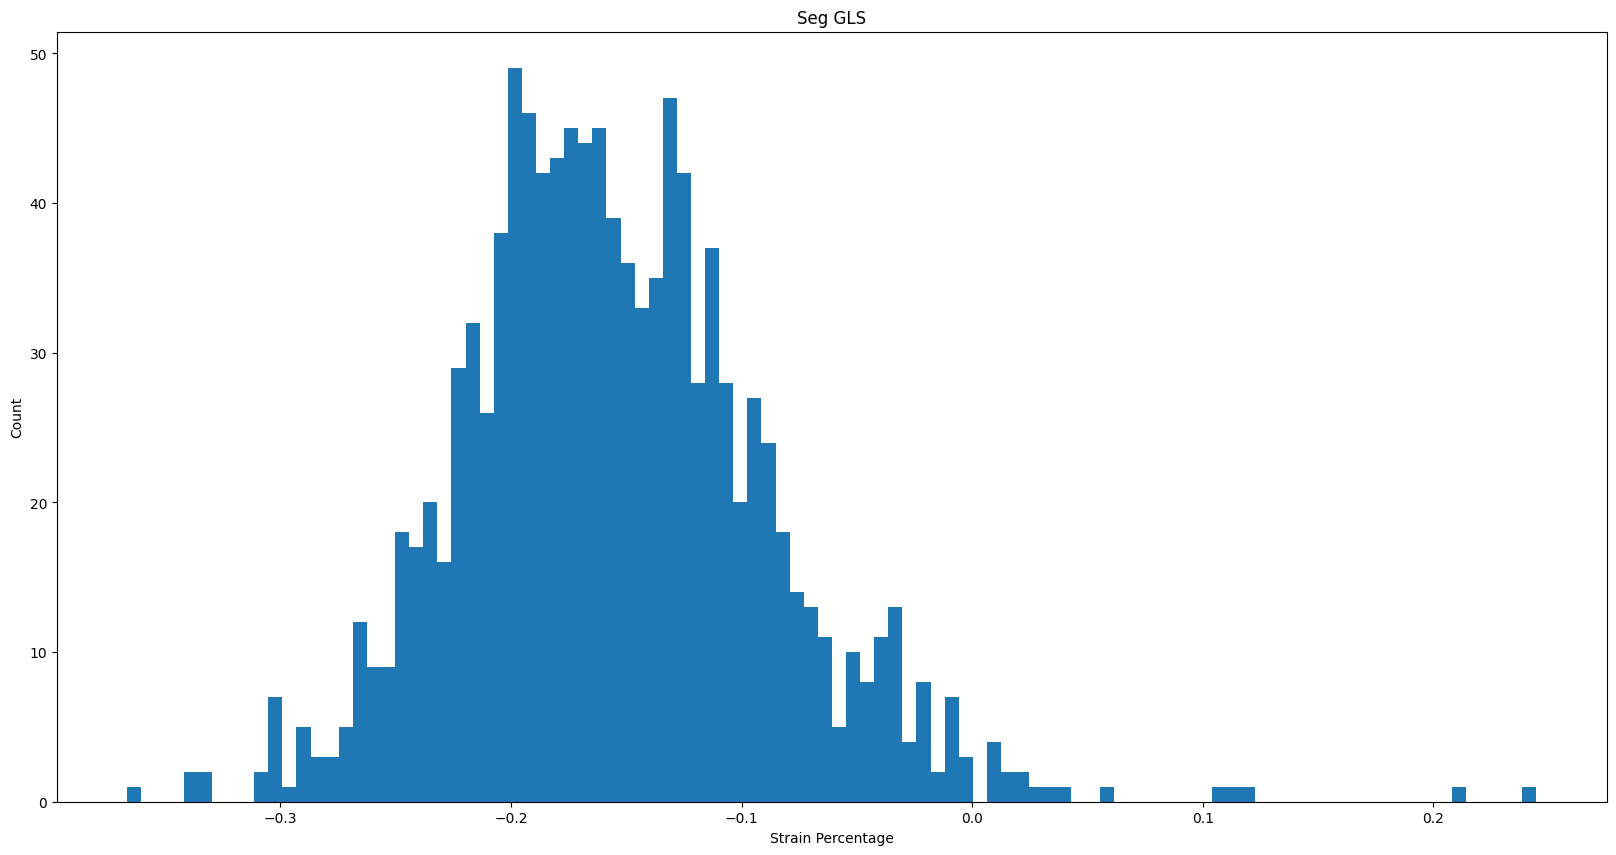

In [15]:
createHist(data, 'Seg GLS', 'Strain Percentage', 'Count')

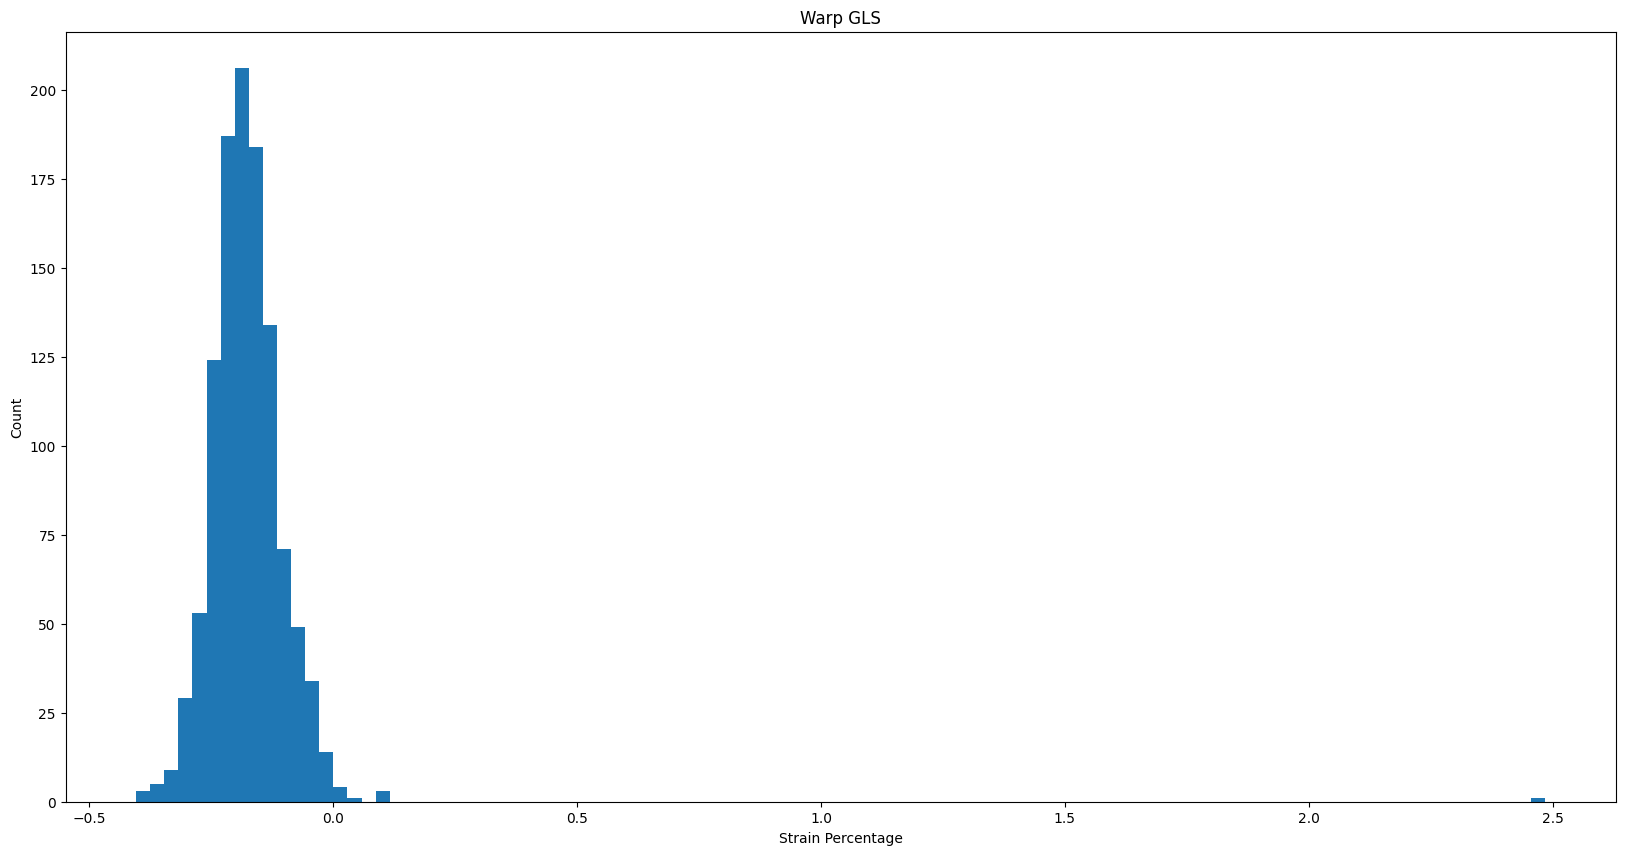

In [16]:
createHist(data, 'Warp GLS', 'Strain Percentage', 'Count')

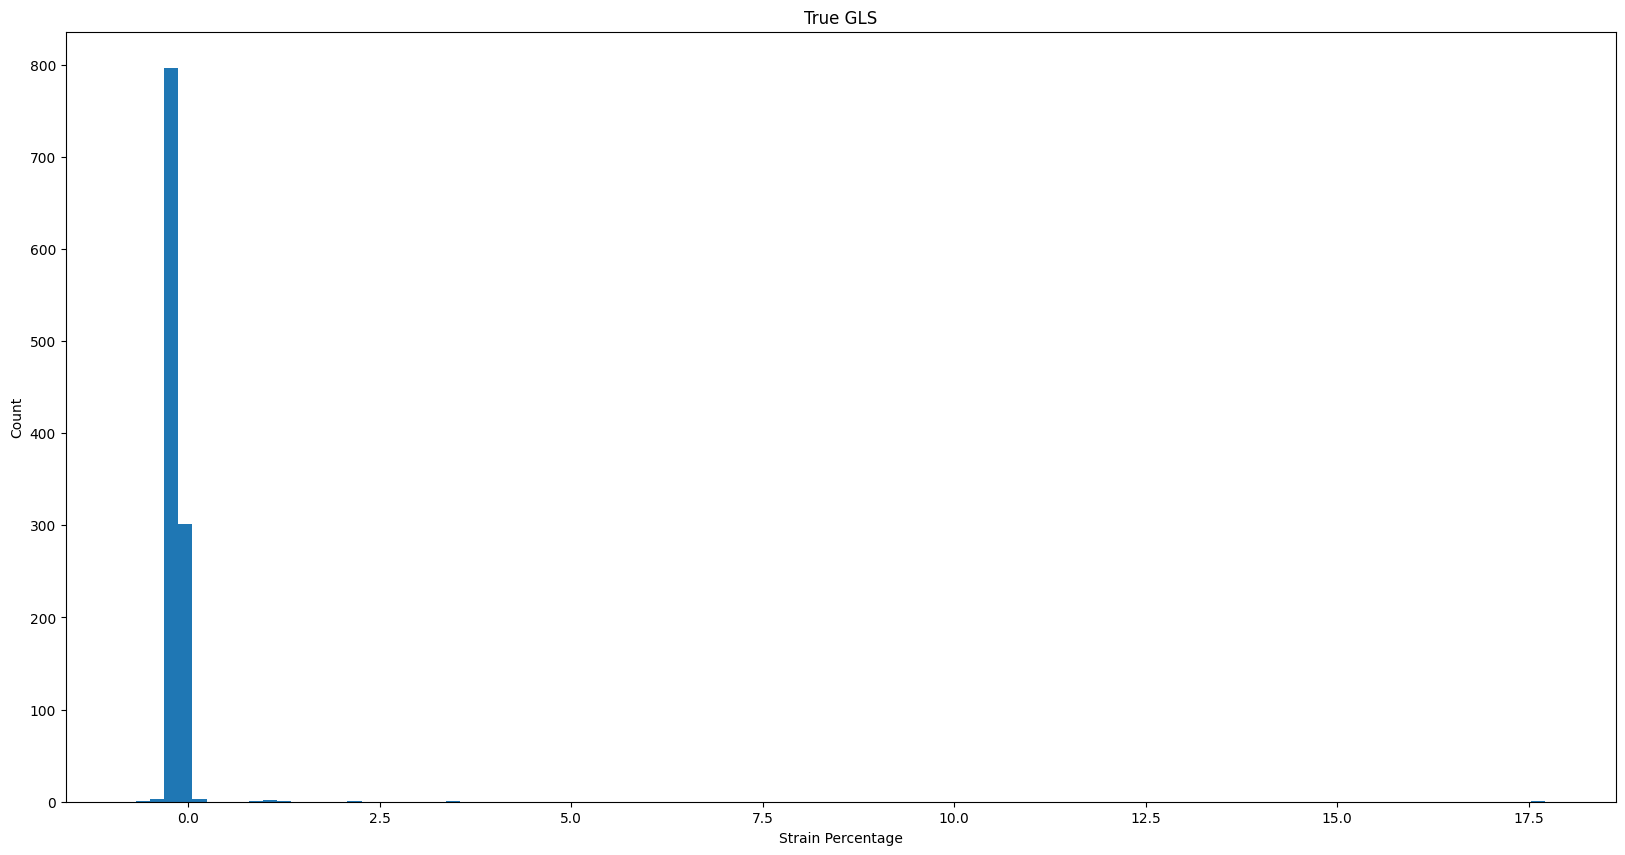

In [17]:
createHist(data, 'True GLS', 'Strain Percentage', 'Count')

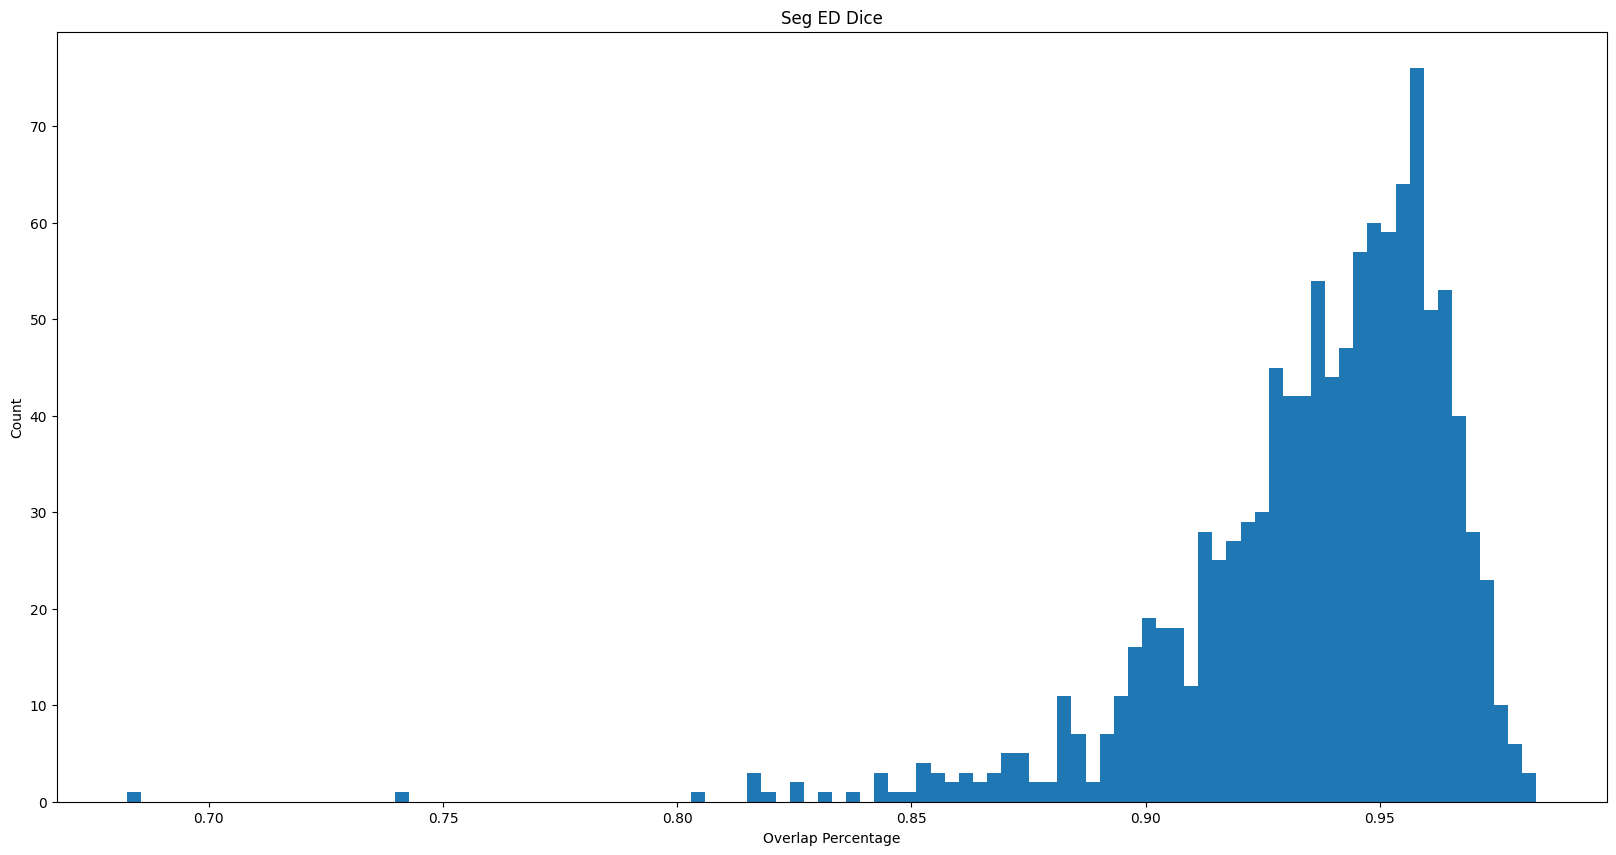

In [19]:
createHist(data, 'Seg ED Dice', 'Overlap Percentage', 'Count')

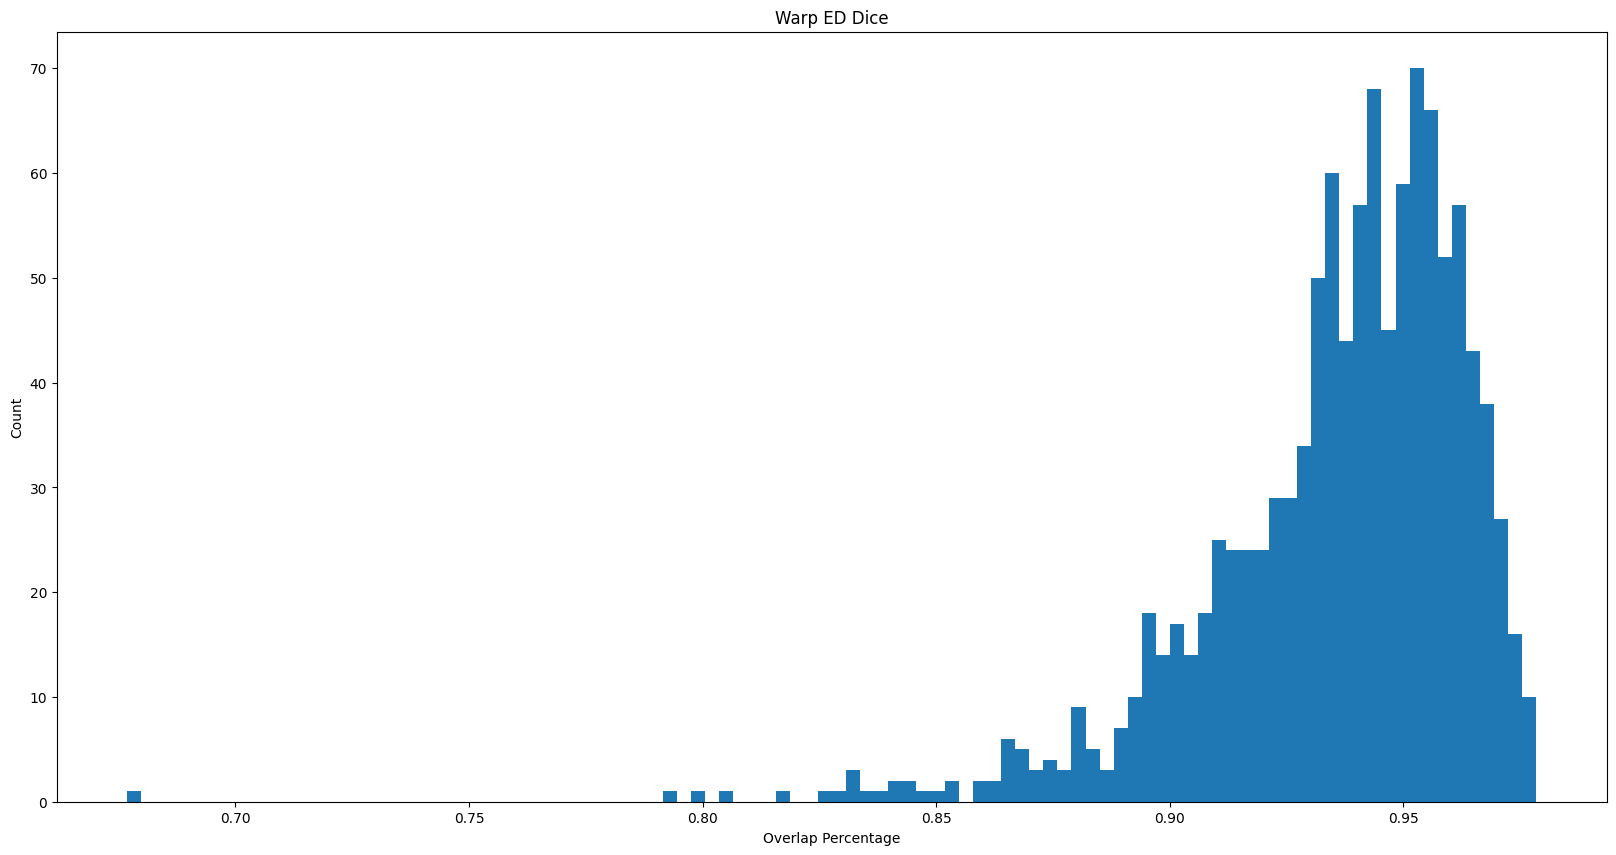

In [22]:
createHist(data, 'Warp ED Dice', 'Overlap Percentage', 'Count')

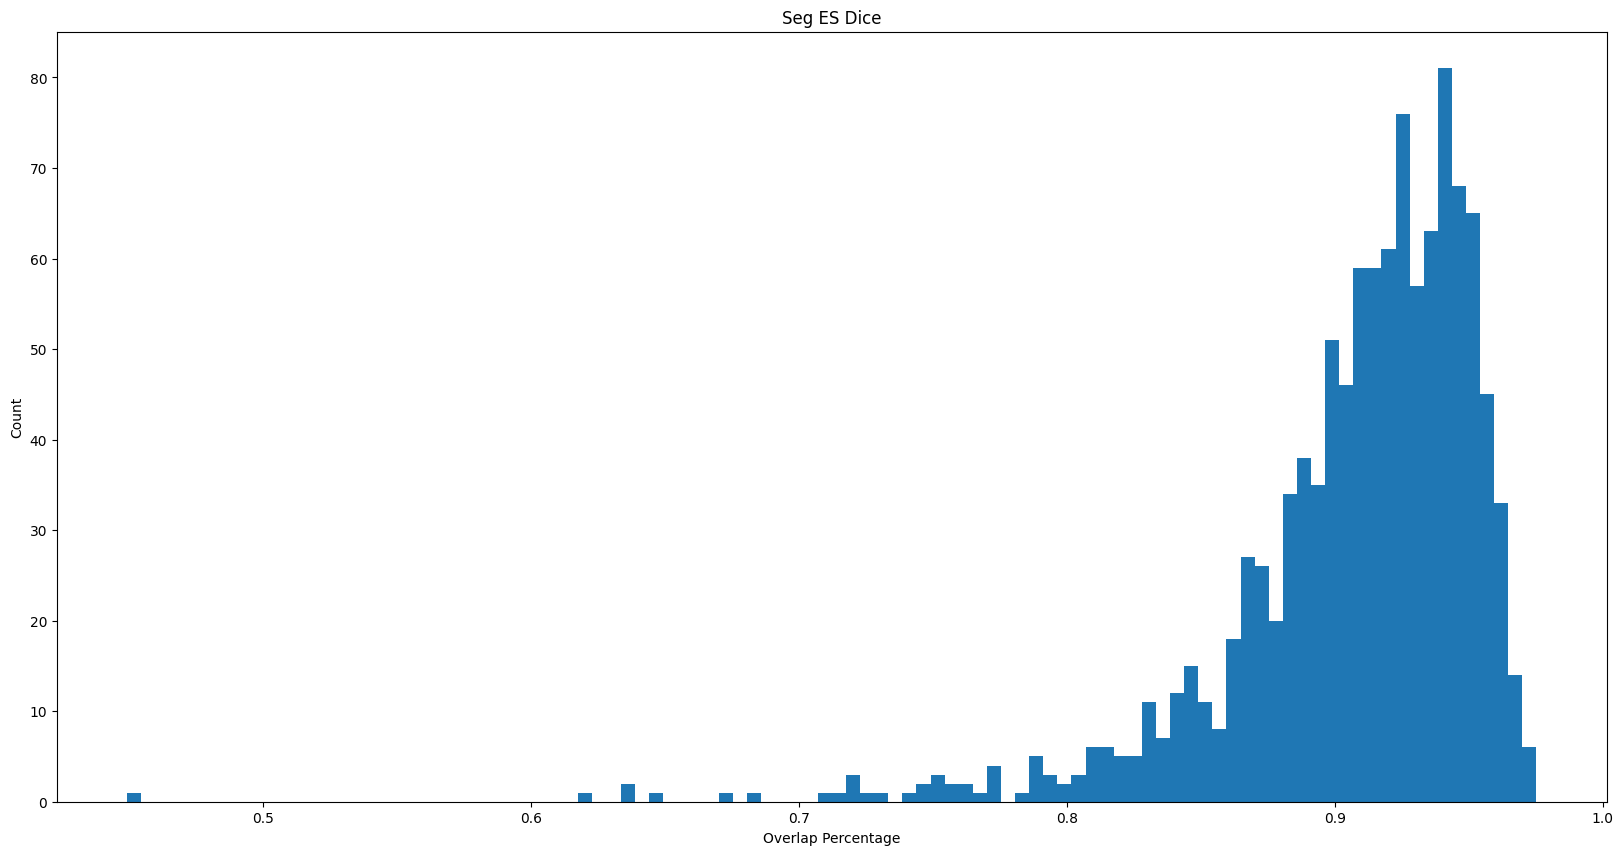

In [21]:
createHist(data, 'Seg ES Dice', 'Overlap Percentage', 'Count')

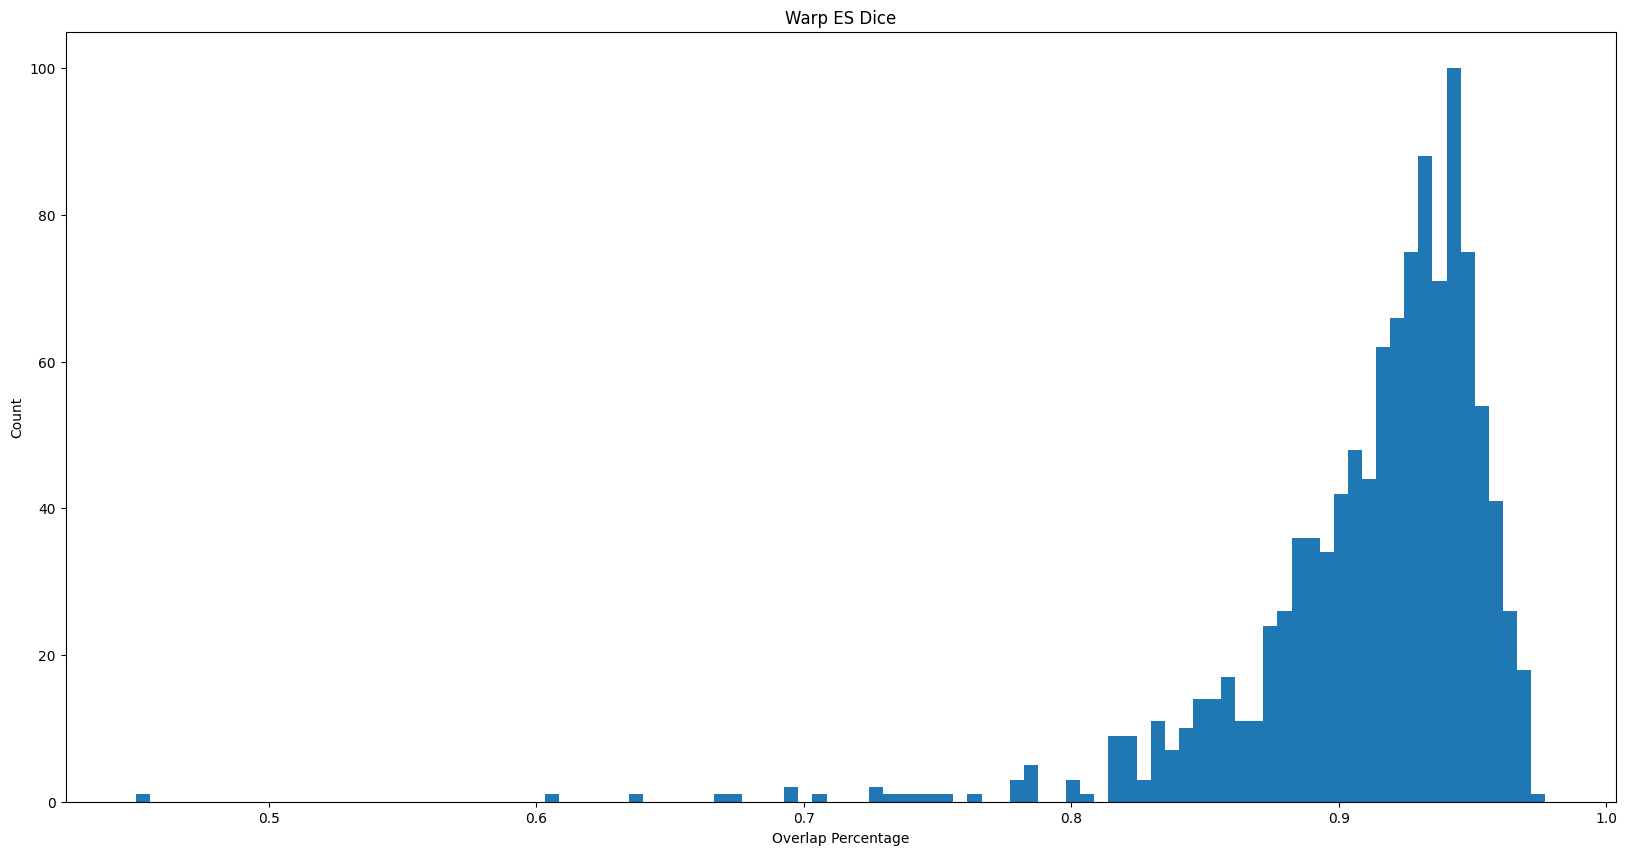

In [23]:
createHist(data, 'Warp ES Dice', 'Overlap Percentage', 'Count')

## Try to plot 3 different distributions of GLS's based on EF value (low, normal, high)

We split up the EF's into three groups where the normal EF range for healthy individuals is considered to be between $[50,70]\%$. Unfortunately, we do not have any data in the dataset about individual patient age's, which would be good information to know and take into consideration about what is a "normal" EF for a healthy person based on their age. Of course, knowing more health indicies would be beneficial to know what is considered a "healthy" range for EF, but alas we make do with what we have.
- $< 50\%$
- $[50,70]$
- $> 70\%$


In [24]:
_min = -0.35 * 100
_max = 0.20 * 100
step = 0.01 * 100

/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

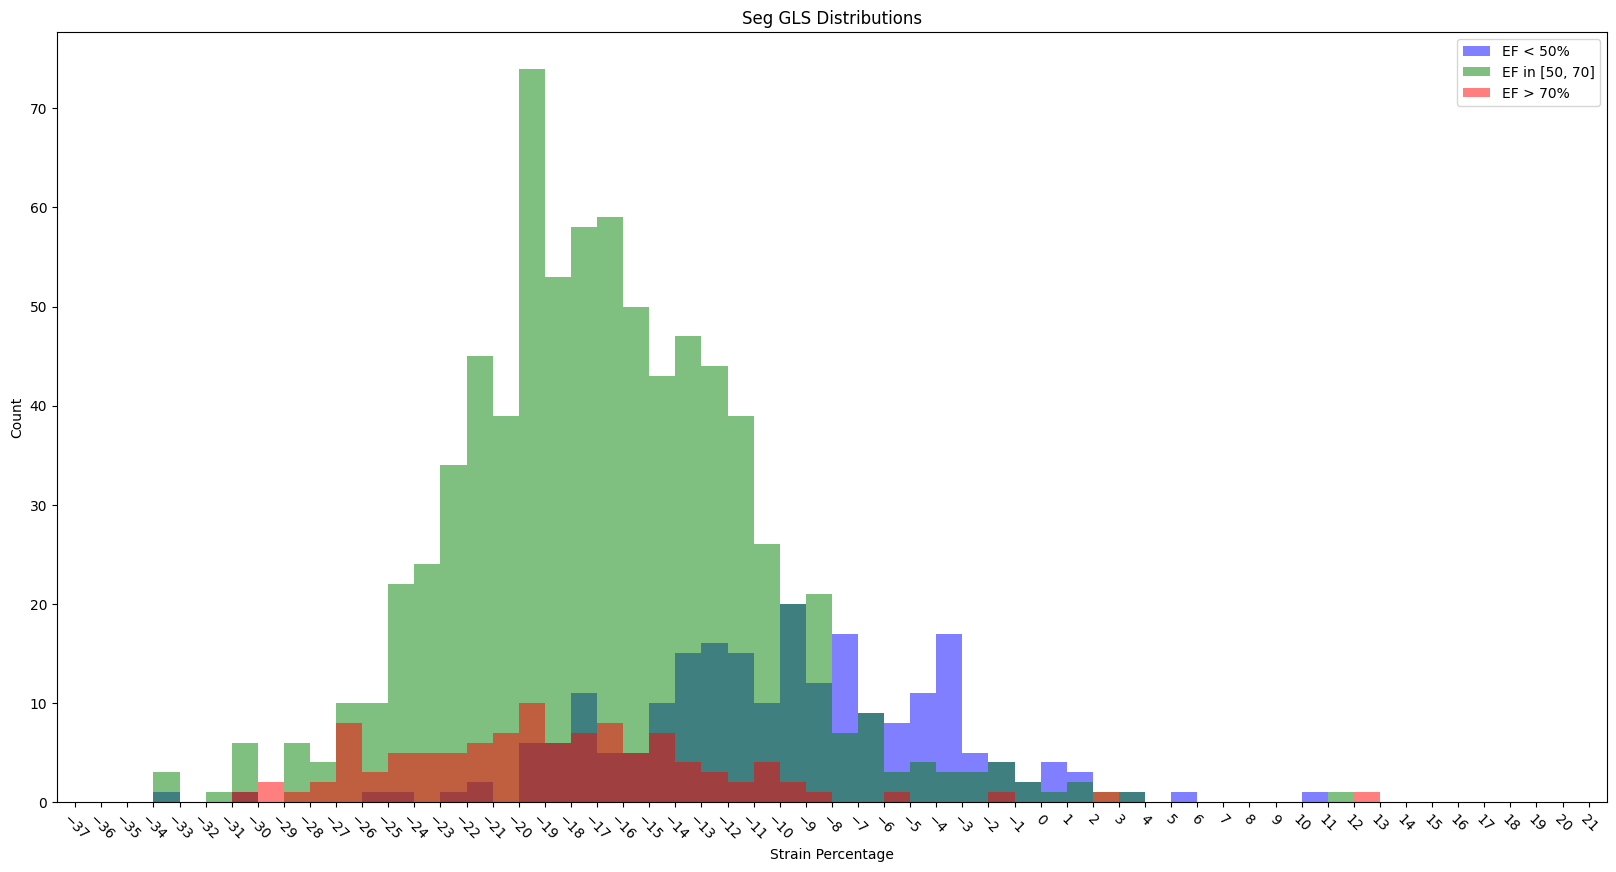

In [26]:
gls_type = "Seg GLS"
# gls_type = "Warp GLS"

low_efs = data.query("`Predicted EF` < 50")
normal_efs = data.query("`Predicted EF` >= 50 and `Predicted EF` <= 70")
high_efs = data.query("`Predicted EF` > 70")

# multiple values by 100 to change data representation from decimal as a percent to regular value as a percent
low_efs[gls_type] *= 100
normal_efs[gls_type] *= 100
high_efs[gls_type] *= 100

fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist(low_efs[gls_type], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label='EF < 50%')
plt.hist(normal_efs[gls_type], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label='EF in [50, 70]')
plt.hist(high_efs[gls_type], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label='EF > 70%')

plt.xticks(rotation = -45)

loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

# labels = [item for item in ax.get_xticklabels()]

plt.legend()
plt.title(f'{gls_type} Distributions')
plt.xlabel('Strain Percentage')
plt.ylabel('Count')
if save_hists_as_svg:
    plt.savefig(f'./images/{name}_predicted_hist.svg')

plt.show()

# print(labels)
# print(labels[0])
# print(type(labels[0]))

/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wmw015/anaconda3/envs/dynamic/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


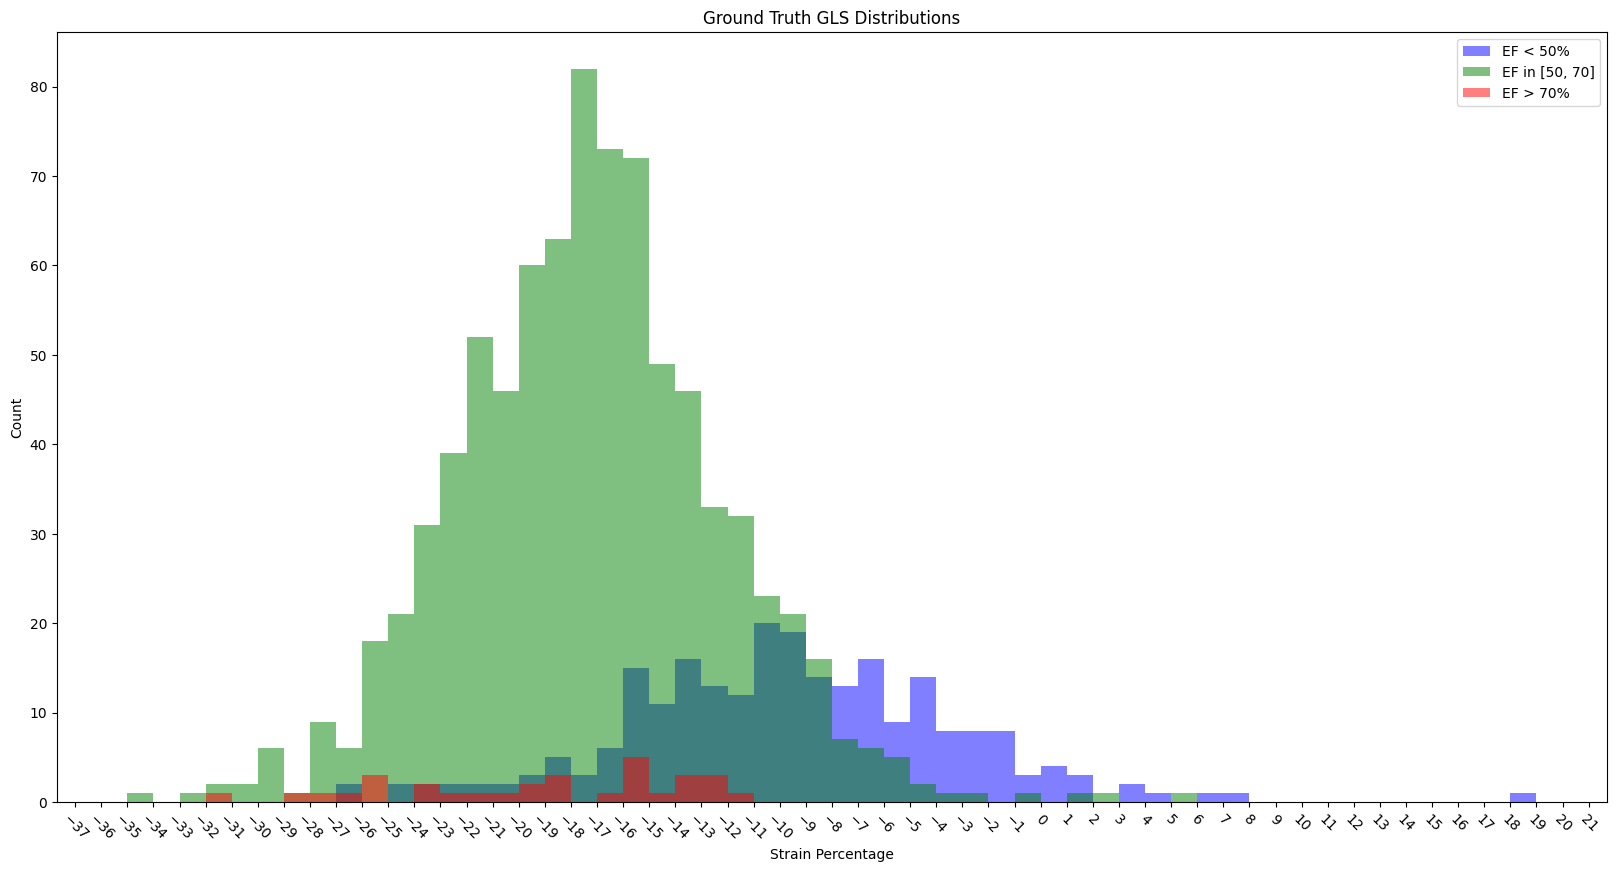

In [27]:
truth_low_efs = data.query("`True EF` < 50")
truth_normal_efs = data.query("`True EF` >= 50 and `True EF` <= 70")
truth_high_efs = data.query("`True EF` > 70")

truth_low_efs['True GLS'] *= 100
truth_normal_efs['True GLS'] *= 100
truth_high_efs['True GLS'] *= 100

fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist(truth_low_efs['True GLS'], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label='EF < 50%')
plt.hist(truth_normal_efs['True GLS'], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label='EF in [50, 70]')
plt.hist(truth_high_efs['True GLS'], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label='EF > 70%')

plt.xticks(rotation = -45)

loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


plt.legend()
plt.title('Ground Truth GLS Distributions')
plt.xlabel('Strain Percentage')
plt.ylabel('Count')
if save_hists_as_svg:
    plt.savefig(f'./images/{name}_truth_hist.svg')

plt.show()

In [ ]:
# data.describe()